Epoch 1/20
25/25 [==============================] - 13s 220ms/step - loss: 0.1630 - val_loss: 0.1328
Epoch 2/20
25/25 [==============================] - 2s 61ms/step - loss: 0.1231 - val_loss: 0.1081
Epoch 3/20
25/25 [==============================] - 1s 50ms/step - loss: 0.0918 - val_loss: 0.0676
Epoch 4/20
25/25 [==============================] - 1s 48ms/step - loss: 0.0427 - val_loss: 0.0108
Epoch 5/20
25/25 [==============================] - 1s 42ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 6/20
25/25 [==============================] - 1s 49ms/step - loss: 2.9133e-04 - val_loss: 9.7995e-05
Epoch 7/20
25/25 [==============================] - 2s 75ms/step - loss: 5.0486e-05 - val_loss: 4.2303e-05
Epoch 8/20
25/25 [==============================] - 2s 74ms/step - loss: 3.2596e-05 - val_loss: 3.3656e-05
Epoch 9/20
25/25 [==============================] - 2s 71ms/step - loss: 2.6955e-05 - val_loss: 2.4531e-05
Epoch 10/20
25/25 [==============================] - 1s 50ms/step - loss: 2

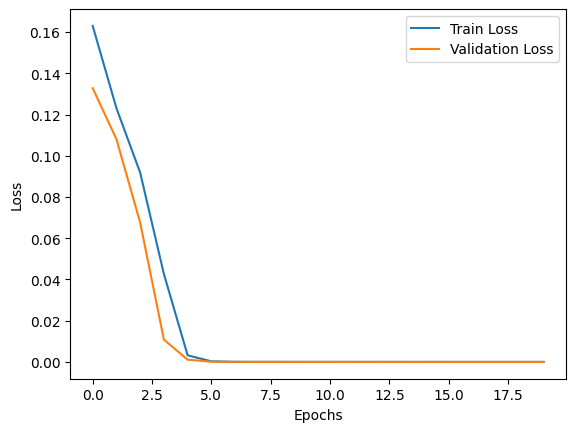

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generar una secuencia de datos senoidal
def generate_sine_wave_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        start = np.random.randint(0, 100)
        end = start + seq_length
        x = np.sin(np.linspace(start, end, seq_length))
        X.append(x[:-1])
        y.append(x[-1])
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000

X, y = generate_sine_wave_data(seq_length, num_samples)

# Normalizar los datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape de los datos para la GRU
X = X.reshape((X.shape[0], X.shape[1], 1))

# Construir el modelo GRU
model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(seq_length-1, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Visualizar el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 419ms/step


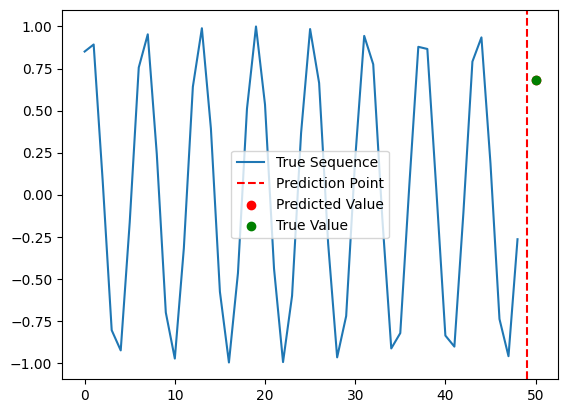

In [ ]:
# Generar una nueva secuencia para predecir
X_new, y_true = generate_sine_wave_data(seq_length, 1)
X_new = scaler_X.transform(X_new)
X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))

# Predicción
y_pred = model.predict(X_new)
y_pred = scaler_y.inverse_transform(y_pred)

X_new = X_new.reshape((X_new.shape[0], X_new.shape[1]))
X_new = scaler_X.inverse_transform(X_new)


# Mostrar los resultados
plt.plot(X_new[0,:], label='True Sequence')
plt.axvline(x=seq_length-1, linestyle='--', color='r', label='Prediction Point')
plt.scatter(seq_length, y_pred, color='r', label='Predicted Value')
plt.scatter(seq_length, y_true, color='g', label='True Value')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
